# YOLO Model Training

Authors: Cait Newport & Rachel Parkinson
Date: 2025-08-08

This notebook demonstrates how to use the YOLO model training script for object detection tasks. The script supports training YOLOv8 models of various sizes on custom datasets.

## Prerequisites

Before running the training script, ensure you have:

1. A dataset in YOLOv8 format
2. A `data.yaml` file describing your dataset
3. The required Python packages installed:
   ```bash
   pip install wandb ultralytics
   ```

Note: you will need a wandb account to use the `YOLO_model_training.py` script. Sign up at https://wandb.ai/site and save your API key for use while running the script.


## Available YOLOv8 Models

The script supports different YOLOv8 model sizes:
- `yolov8n.pt` - Nano model (smallest, fastest, least accurate)
- `yolov8s.pt` - Small model
- `yolov8m.pt` - Medium model
- `yolov8l.pt` - Large model
- `yolov8x.pt` - Extra Large model (largest, slowest, most accurate)

## Example Usage

Here are example configurations for different training scenarios:

### 1. Nano Model Training (YOLOv8n, 10 epochs)

In [ ]:
!python ../beeyolo/YOLO_model_training.py \
--project_name "alive-dead-bee-detection" \
--run_name "yolov8n-full-training" \
--data_yaml "../dataset/alive-dead-data/data.yaml" \
--train_path "../dataset/alive-dead-data/train/images" \
--val_path "../dataset/alive-dead-data/val/images" \
--model_size "n" \
--epochs 10 \
--batch_size 8 \
--image_size 720

### 2. Small Model Training Run (YOLOv8s, 10 epochs)

In [ ]:
!python ../beeyolo/YOLO_model_training.py \
--project_name "alive-dead-bee-detection" \
--run_name "yolov8s-full-training" \
--data_yaml "../dataset/alive-dead-data/data.yaml" \
--train_path "../dataset/alive-dead-data/train/images" \
--val_path "../dataset/alive-dead-data/val/images" \
--model_size "s" \
--epochs 10 \
--batch_size 8 \
--image_size 720

### 3. Full Training Run (YOLOv8n, 100 epochs)

In [3]:
!python ../beeyolo/YOLO_model_training.py \
--project_name "bee-alive-dead-detection" \
--run_name "yolov8n-full-training" \
--data_yaml "../dataset/alive-dead-data/data.yaml" \
--train_path "../dataset/alive-dead-data/train/images" \
--val_path "../dataset/alive-dead-data/val/images" \
--model_size "n" \
--epochs 100 \
--batch_size 8 \
--image_size 720


DEBUG: Checking paths...
Current working directory: c:\Users\r4che\Documents\beeYOLO\notebooks

data.yaml path: ../dataset/alive-dead-data/data.yaml
data.yaml exists: True

Train images path: ../dataset/alive-dead-data/train/images
Train labels path: ../dataset/alive-dead-data/train/labels
Val images path: ../dataset/alive-dead-data/val/images
Val labels path: ../dataset/alive-dead-data/val/labels

Train images directory exists: True
Train labels directory exists: True
Val images directory exists: True
Val labels directory exists: True

File counts:
Train images: 155
Train labels: 155
Val images: 50
Val labels: 49

Loading model: yolov8n.pt
Using device: cpu
New https://pypi.org/project/ultralytics/8.3.176 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.132  Python-3.10.14 torch-2.7.0+cpu CPU (Intel Core(TM) i7-9700K 3.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, clas

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\r4che\_netrc
wandb: Currently logged in as: r4chelp (r4chelp-university-of-oxford) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.11
wandb: Run data is saved locally in c:\Users\r4che\Documents\beeYOLO\notebooks\wandb\run-20250808_150521-lwonjl13
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run yolov8n-full-training
wandb:  View project at https://wandb.ai/r4chelp-university-of-oxford/bee-alive-dead-detection
wandb:  View run at https://wandb.ai/r4chelp-university-of-oxford/bee-alive-dead-detection/runs/lwonjl13

train: Scanning C:\Users\r4che\Documents\beeYOLO\dataset\alive-dead-data\train\labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]
train: Scanning C:\Users\r4che\Documents\beeYOLO\dataset\alive-dead-data\train\labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/

## Parameter Descriptions

- `--project_name`: Name of your Weights & Biases project
- `--run_name`: Name of this specific training run
- `--data_yaml`: Path to your YOLO format data.yaml file
- `--train_path`: Path to your training images directory
- `--val_path`: Path to your validation images directory
- `--model_size`: YOLOv8 model size (n/s/m/l/x)
- `--epochs`: Number of training epochs (default: 100)
- `--batch_size`: Training batch size (default: 16)
- `--image_size`: Input image size (default: 640)

## Notes

- The script automatically uses GPU if available, falling back to MPS (on Mac) or CPU if not
- Training progress is logged to Weights & Biases
- Model checkpoints are saved every 10 epochs
- The script performs validation checks on your dataset before training

## Model Comparison
Let's compare the performance of different YOLO models we've trained. We'll create visualizations and metrics comparisons using the training results.

In [4]:
%load_ext autoreload
%autoreload 2


image 1/1 c:\Users\r4che\Documents\beeYOLO\notebooks\..\dataset\alive-dead-data\val\images\img1012.png: 384x640 2 bee_alives, 1 bee_dead, 1 feeder, 42.9ms
Speed: 1.2ms preprocess, 42.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Users\r4che\Documents\beeYOLO\notebooks\..\dataset\alive-dead-data\val\images\img1012.png: 416x736 2 bee_alives, 1 bee_dead, 1 feeder, 44.3ms
Speed: 2.0ms preprocess, 44.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 736)


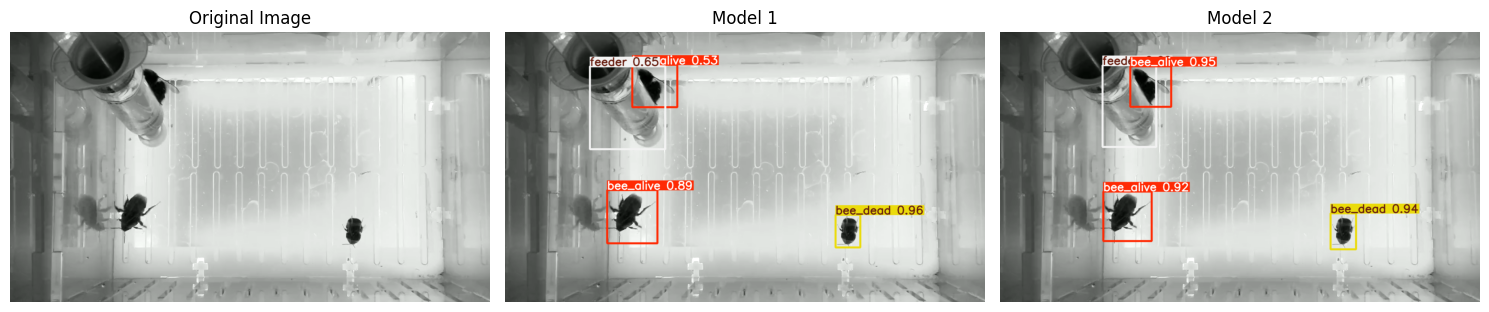

In [7]:
from beeyolo import compare_model_predictions

# Define paths for test image and models
# Here you can choose any image from your validation set to test the models
# Make sure you set the correct path to your model runs (folder structure will be similar to the example below)

test_image = "../dataset/alive-dead-data/val/images/img1012.png"  # Replace with your test image
model_paths = [
    'runs/detect/train4/weights/best.pt',
    'runs/detect/train5/weights/best.pt'
]

# Compare model predictions
try:
    compare_model_predictions(model_paths, test_image)
except Exception as e:
    print(f"Error comparing predictions: {e}")


Final Metrics Summary:


,metrics/mAP50(B),metrics/mAP50-95(B),train/box_loss,val/box_loss
model,,,,
YOLOv8n (10 epochs),0.9216,0.6903,0.8232,0.8611
YOLOv8n (100 epochs),0.9251,0.7585,0.5287,0.7226


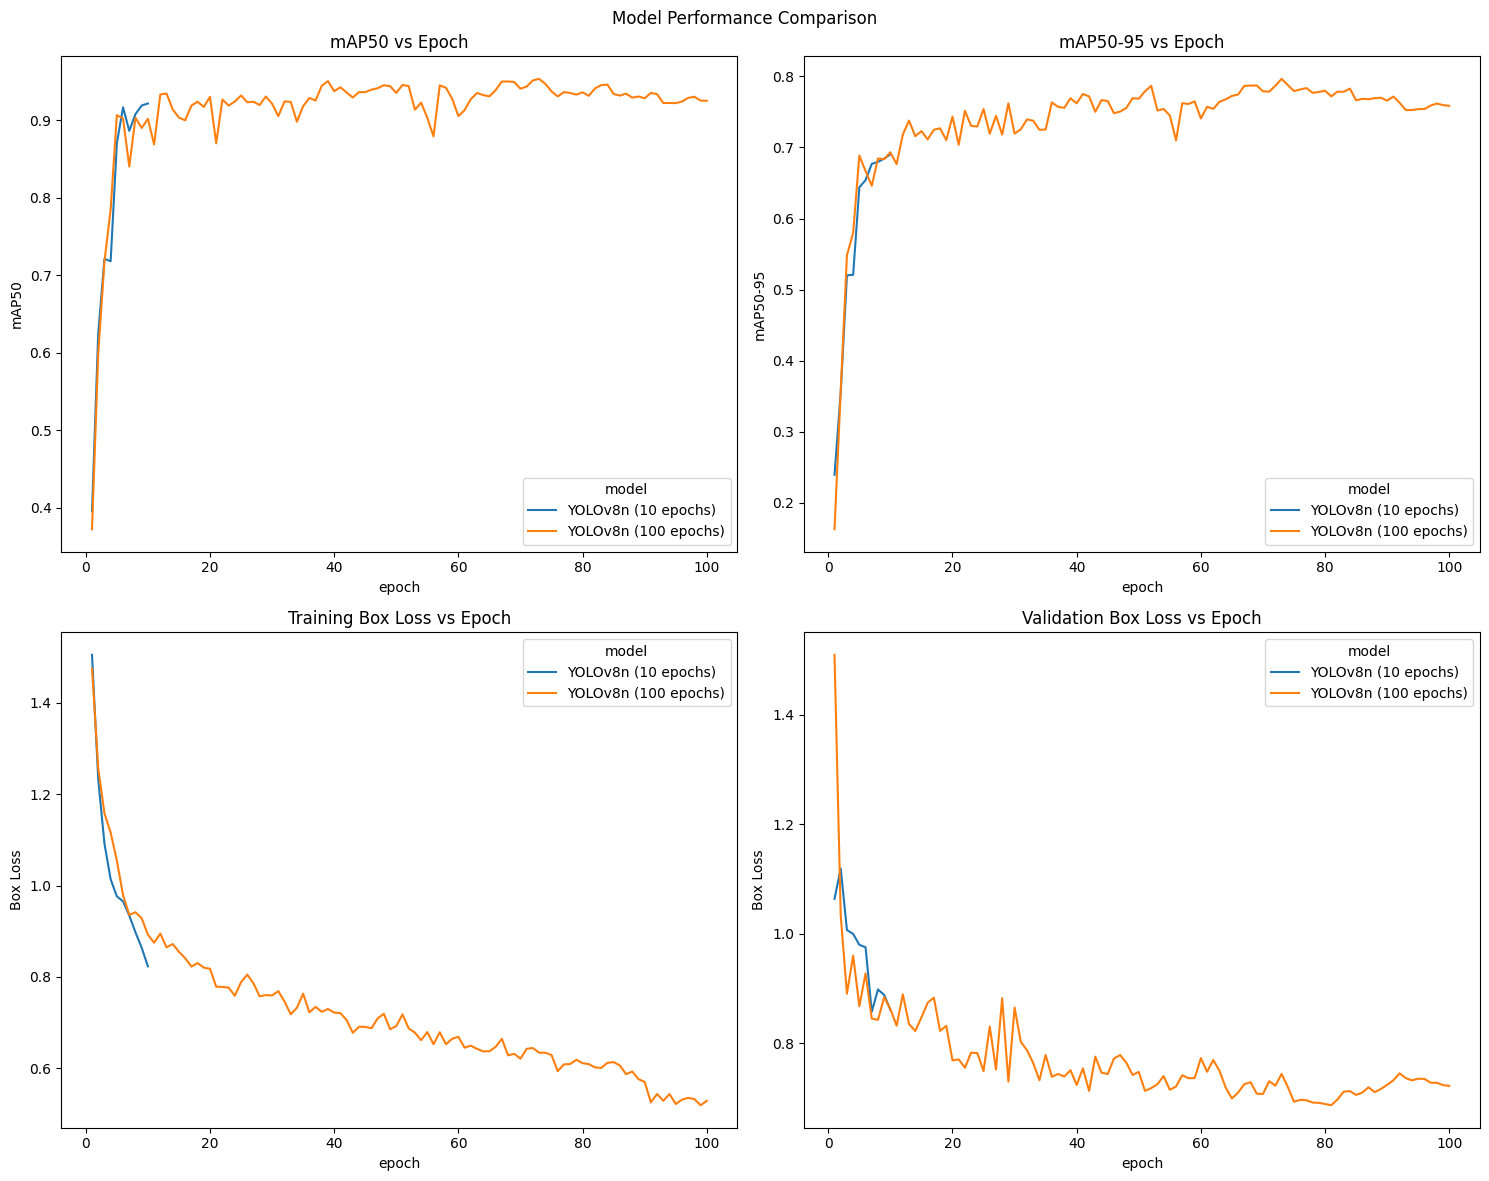

In [ ]:
from beeyolo import compare_models

# Define paths and names for the training runs
run_dirs = [
    'runs/detect/train6',  # YOLOv8n 10 epochs
    'runs/detect/train7', # YOLOv8s 10 epochs
    'runs/detect/train5'  # YOLOv8n 100 epochs
]

run_names = [
    'YOLOv8n (10 epochs)',
    'YOLOv8s (10 epochs)',
    'YOLOv8n (100 epochs)'
]

# Compare metrics across models
try:
    metrics_df = compare_models(run_dirs, run_names)
    
    # Print final metrics summary
    print("\nFinal Metrics Summary:")
    final_metrics = metrics_df.groupby('model').last()[
        ['metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'train/box_loss', 'val/box_loss']
    ]
    display(final_metrics.round(4))
    
except Exception as e:
    print(f"Error comparing models: {e}")

### Interpreting the Results

The plots above show several key metrics for comparing model performance:

1. **mAP (Mean Average Precision)**:
   - mAP50: Detection accuracy at 50% IOU threshold
   - mAP50-95: Average detection accuracy across different IOU thresholds
   - Higher values indicate better performance

2. **Loss Metrics**:
   - Training box loss: Shows how well the model is learning
   - Validation box loss: Shows how well the model generalizes
   - Lower values indicate better performance

3. **Model Comparison**:
   - YOLOv8n (10 epochs): Quick training baseline
   - YOLOv8s (10 epochs): Impact of larger model
   - YOLOv8n (100 epochs): Impact of longer training